In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect to data base
import mysql.connector as mysql
from mysql.connector import Error
try:
    db = mysql.connect(
        host = "localhost",
        database='mestrado2NOTA',
        user = "root",
        passwd = "admin"
    )
    
    if db.is_connected():
        cursor = db.cursor(buffered=True)
#         cursor = db.cursor()
except Error as e:
    print("Error while connecting to MySQL", e)

In [3]:
select_query = "select semester_year, count(*) as total, SUM(CASE WHEN num_score > 2 THEN 1 ELSE 0 END) as Passed from student_course_subject as SCS INNER JOIN subjects as S ON S.id = SCS.id_subject where name='ALGORITMOS E PROGRAMACAO DE COMPUTADORES' group by semester_year ;"
cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names


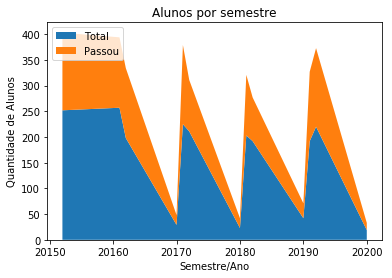

In [4]:
total = records['total']
passou = pd.to_numeric(records['Passed'])

semester_year = pd.to_numeric(records['semester_year']).tolist()
dt = pd.DataFrame()

y = [total.tolist(), passou.tolist()]

plt.stackplot(semester_year,y, labels=['Total','Passou'])
plt.legend(loc='upper left')
plt.title('Alunos por semestre')
plt.xlabel('Semestre/Ano')
plt.ylabel('Quantidade de Alunos')
plt.show()


evolução das notas durante o semestre na matéria

In [5]:
select_query = "select semester_year, AVG(num_score) as AVG from student_course_subject as SCS INNER JOIN subjects as S ON S.id = SCS.id_subject where name='ALGORITMOS E PROGRAMACAO DE COMPUTADORES' group by semester_year ;"
cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names


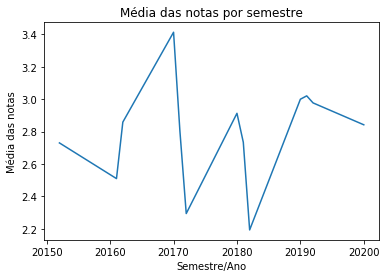

In [6]:
semester_year = pd.to_numeric(records['semester_year']).tolist()
AVG = pd.to_numeric(records['AVG']).tolist()

plt.plot(semester_year, AVG)
plt.title('Média das notas por semestre')
plt.xlabel('Semestre/Ano')
plt.ylabel('Média das notas')
plt.show()


média das notas na matéria (box-plot)

In [7]:
select_query = "select num_score from student_course_subject as SCS INNER JOIN subjects as S ON S.id = SCS.id_subject where name='ALGORITMOS E PROGRAMACAO DE COMPUTADORES';"
cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names


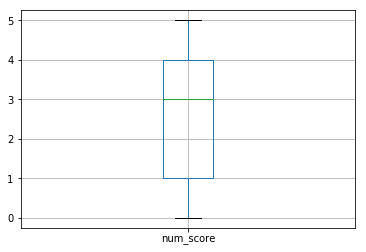

In [8]:
records['num_score'] = records['num_score'].astype(float)
boxplot = records.boxplot(column=['num_score'])

média das notas na matéria (violin)

In [9]:
select_query = "select num_score from student_course_subject as SCS INNER JOIN subjects as S ON S.id = SCS.id_subject where name='ALGORITMOS E PROGRAMACAO DE COMPUTADORES';"
cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names


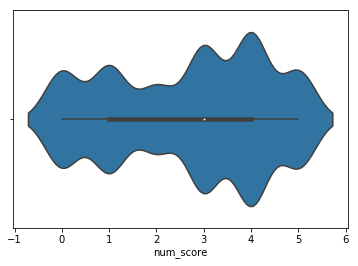

In [10]:
ax = sns.violinplot(x="num_score", data=records)
plt.show()